In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv(r"C:\Users\umuta\OneDrive\Masaüstü\British Airways Simulaton\data\customer_booking.csv", encoding='ISO-8859-1')

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
X = df.drop(columns=['booking_complete'])  
y = df['booking_complete'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


Categorical columns: Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8532666666666666
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12784
           1       0.51      0.13      0.20      2216

    accuracy                           0.85     15000
   macro avg       0.69      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000



In [15]:
X.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'sales_channel_Mobile', 'trip_type_OneWay',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=918)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8559
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



In [17]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report)

Accuracy: 0.8559
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



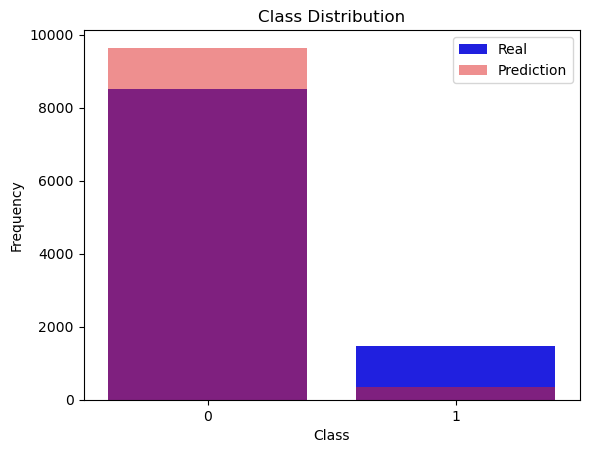

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_test, label='Real', color='b')
sns.countplot(x=y_pred, label='Prediction', color='r', alpha=0.5)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.legend()
plt.show()

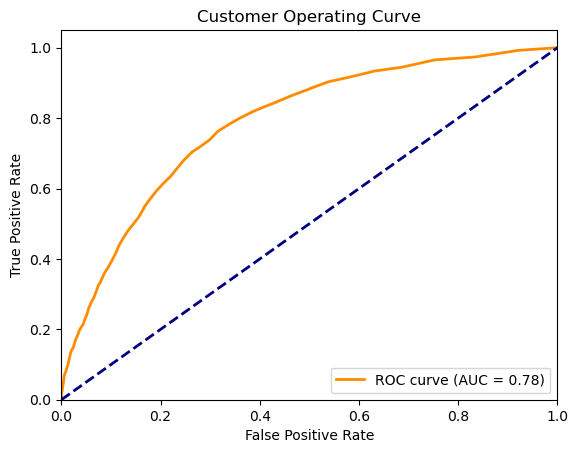

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Operating Curve')
plt.legend(loc="lower right")
plt.show()